In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [22]:
jf = "m247514_Site3Annotation_MN_global.json"

In [23]:
with open("m247514_Site3Annotation_MN_global.json") as jd:
    d = json.load(jd)

# Looking at the first set of points

In [24]:
al0 = d['area_lists'][0]

In [25]:
for i in range(len(al0['areas'])):
    x = al0['areas'][i]['global_path']

In [26]:
x = [i[0] for i in al0['areas'][0]['global_path']]
y = [-i[1] for i in al0['areas'][0]['global_path']]
z = [al0['areas'][0]['z'] for i in al0['areas'][0]['global_path']]

In [27]:
len(d['area_lists'])

1046

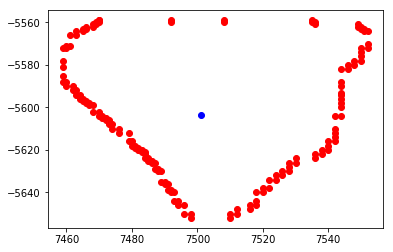

In [28]:
plt.plot(x, y, 'ro')
plt.plot(np.mean(x), np.mean(y), 'ro', color = 'blue')
plt.show()

# Functions and grabbing all locations

In [29]:
def colMean(globalPath, z):
    x = np.mean([i[0] for i in globalPath])
    y = np.mean([i[1] for i in globalPath])
    z = np.mean(z)
    means = [x,y,z]
    return(means)

def colMedian(globalPath, z):
    x = np.median([i[0] for i in globalPath])
    y = np.median([i[1] for i in globalPath])
    z = np.median(z)
    medians = [x,y,z]
    return(medians)

In [30]:
am = []
ids = []
for ai in d['area_lists']:
    anno = { 'id': ai['id'], 'ggp': [], 'z': []}
    ids.append(ai['id'])
    for gp in ai['areas']:
        anno['ggp'].extend(gp['global_path'])
        anno['z'].append(gp['z'])
    am.append([colMean(anno['ggp'], anno['z']), anno['id']])
    

In [31]:
idsp1 = [i + 1 for i in ids]

In [32]:
anno_at = np.asarray(np.round([[(i[0][0]*3)/96, (i[0][1]*3)/96, i[0][2]] for i in am]))
anno_em = np.asarray(np.round([[i[0][0], i[0][1], i[0][2]] for i in am]))
anno_nm = np.asarray(([[i[0][0]/3, i[0][1]/3, i[0][2]] for i in am]))

In [33]:
tmp = anno_at
dfg = np.column_stack([tmp,ids])

In [35]:
anno_at[0]

array([230., 186.,  38.])

# save locations to csv files

In [32]:
if False:
    #a = np.asarray(np.round(am))
    np.savetxt("rorb_locations_nm.csv", np.column_stack([anno_nm, ids]), delimiter=",", fmt = "%f")
    np.savetxt("rorb_locations_at.csv", np.column_stack([anno_at, ids]), delimiter=",", fmt = "%d")
    np.savetxt("rorb_locations_em.csv", np.column_stack([anno_em, ids]), delimiter=",", fmt = "%d")


In [35]:
if False:
    #a = np.asarray(np.round(am))
    np.savetxt("rorb_locations_nm_idp1.csv", np.column_stack([anno_nm, idsp1]), delimiter=",", fmt = "%f")
    np.savetxt("rorb_locations_at_idp1.csv", np.column_stack([anno_at, idsp1]), delimiter=",", fmt = "%d")
    np.savetxt("rorb_locations_em_idp1.csv", np.column_stack([anno_em, idsp1]), delimiter=",", fmt = "%d")